In [311]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import sem, bernoulli 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [312]:
def bernoulli_replicator(n,p, replications):
    """ This function does:
            1. It collects n random draws from the bernoulli distribution
               and counts the successes which is then divided by n to retrieve the sample mean. 
            2. If the sample mean is within the confidence interval, it is appended to coverage. 
            3. For my own reference, the function also plots the kernel density function. 
        
    """
    estimates = [] # stores sample mean
    coverage = [] # appends sample mean if within confidence interval
    standard = [] # stores the standard errors
    
    
    for i in range(replications):
        sample = (np.random.binomial(n,p)) / n
        estimates.append(sample)
        std = np.sqrt((sample*(1-sample)))
        left_tail = sample - 1.96* std/np.sqrt(n)
        right_tail = sample + 1.96*std/np.sqrt(n)
        standard.append(std)
        if p > left_tail and p < right_tail:
            coverage.append(sample)
            
    pd.DataFrame(estimates).plot(kind = "density", title = "Binomial density function of n = {} and p = {}".format(n,p),     figsize = (9,9))
    plt.show()
    print("mean estimate of: {} is {} and standard deviation is {} ".format(p,np.mean(estimates), np.mean(standard)))
    print("Coverage rate in percentage is: {}%".format((len(coverage)/1000)*100))

# Part 1

**1)**
> **For n = 30, p =0.05:** <br>
>> mean estimate of p: 0.05156666666666666 <br>
>> mean estimate of the true standard deviation: 0.18797116013643222 
>> Coverage rate: 78.0%

> **For n = 60, p =0.05:** <br>
>> mean estimate of p: 0.05015000000000001 <br>
>> mean estimate of the true standard deviation: 0.20687264390435675 
>> Coverage rate: 80.30000000000001%

> **For n = 30, p =0.25:** <br>
>> mean estimate of p: 0.24913333333333332 <br>
>> mean estimate of the true standard deviation: 0.42254040858793973 
>> Coverage rate: 96.6%

> **For n = 60, p =0.25:** <br>
>> mean estimate of p: 0.2501333333333333 <br>
>> mean estimate of the true standard deviation: 0.4281945352197115
>> Coverage rate: 93.5%

**It is often claimed that n of 30 or larger is
enough to ensure that asymptotic confidence intervals work well. Do you agree or not?**
> I do not agree. While having p that is closer to 0.5 will marginally improve the coverage rate, sample of size n=30 do not appear to have adequate asymptotic confidence intervals. Specifically, when n is equal to 30 and p = 0.05 the coverage rate is only 78%. The reason as to why p= 0.25 is more accurate, I think,  has to do with the standard deviation of the distribution. Since the standard deviation of a bernoulli is largest at p = 0.5, it is safe to say that when p is small, n has to be significantly bigger which is indeed true. Setting n = 90, the coverage rate is almost 92%

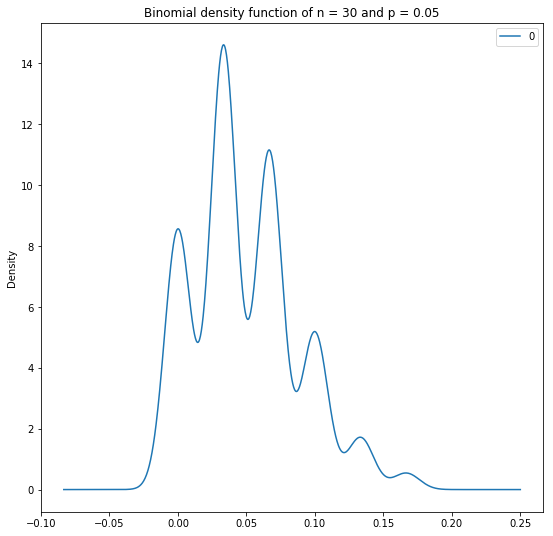

mean estimate of: 0.05 is 0.0495 and standard deviation is 0.18541055818954857 
Coverage rate in percentage is: 79.5%


In [337]:
bernoulli_replicator(30,0.05,1000)

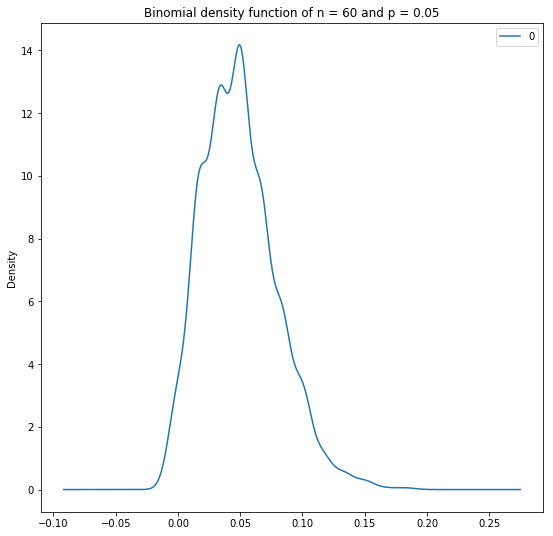

mean estimate of: 0.05 is 0.0495 and standard deviation is 0.2022807037308736 
Coverage rate in percentage is: 77.3%


In [314]:
bernoulli_replicator(60,0.05,1000)

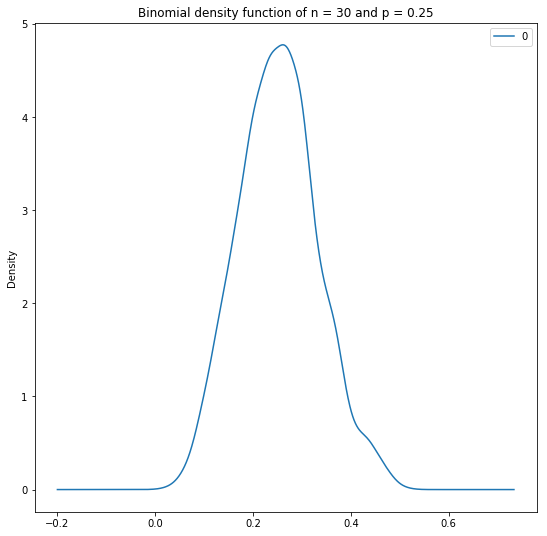

mean estimate of: 0.25 is 0.2513 and standard deviation is 0.42335110501834244 
Coverage rate in percentage is: 92.80000000000001%


In [315]:
bernoulli_replicator(30,0.25,1000)

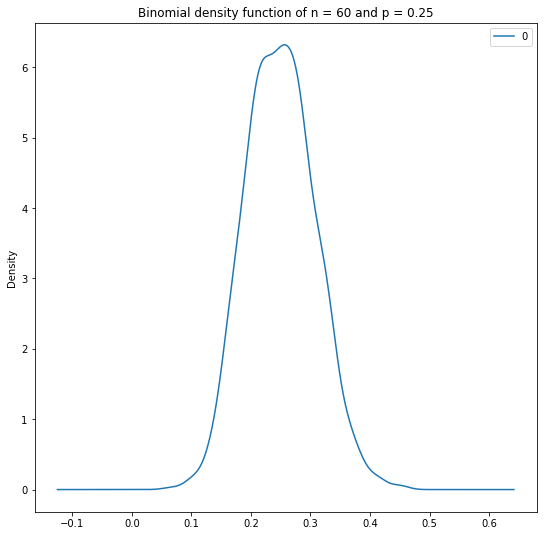

mean estimate of: 0.25 is 0.2497333333333333 and standard deviation is 0.42762590015252033 
Coverage rate in percentage is: 93.89999999999999%


In [316]:
bernoulli_replicator(60,0.25,1000)

# Part 2 


## a)

In [317]:
data = pd.read_csv("ps1.csv")
data = data.sort_values(by = 'momweight')

In [318]:
# Calculates the ten deciles for momweight.
np.percentile(data["momweight"], [10,20,30,40,50,60,70,80,90]) 


array([108., 115., 121., 128., 133., 140., 147., 158., 172.])

In [319]:
#adds another column to the dataset showing what decile each row is in.
deciles = [0,107.5,114.5,120.5,127.5,132.5,139.5,146.5,157.5,290]
dd2 = data # Copies the dataset
#Adds a new column showing which decile each women is in.
dd2["Decile"] = pd.cut(dd2["momweight"], deciles, labels = [1,2,3,4,5,6,7,8,9])
#Grouping by deciles and takes the mean for each decile.
x = dd2.groupby("Decile").mean()

In [320]:
#Percentiles

#10th
d10th=dd2.groupby("Decile").quantile(0.1)
d10th['momweight'] = dd2.groupby("Decile").mean()["momweight"]
#25th
d25th=dd2.groupby("Decile").quantile(0.25)
d25th['momweight'] = dd2.groupby("Decile").mean()["momweight"]
#50th
d50th=dd2.groupby("Decile").quantile(0.50)
d50th['momweight'] = dd2.groupby("Decile").mean()["momweight"]
#75th
d75th=dd2.groupby("Decile").quantile(0.75)
d75th['momweight'] = dd2.groupby("Decile").mean()["momweight"]
#90th
d90th=dd2.groupby("Decile").quantile(0.90)
d90th['momweight'] = dd2.groupby("Decile").mean()["momweight"]






In [321]:
d10th["momweight"]

Decile
1    100.169458
2    110.773163
3    117.924272
4    124.450563
5    129.882215
6    135.687081
7    142.367559
8    151.521680
9    175.782210
Name: momweight, dtype: float64

In [322]:
data = data.drop("Decile", axis = 1)

## (i) & (ii)

> Yes I do see an interesting partern. The dispersion of babyweight in each decile is significant. Personally I do not know how different newborns are in weight but I would have assumed that babyweigt for women that are ~equal in size would also have babies roughly ~equal in birthweight. However, for example, comparing the 25th and 75th percentile of the first decile, the difference is ~1100 grams ,2500 grams vs 3650 grams in babies weight which is large. Further, each percentile seem to be following the same linear pattern. 

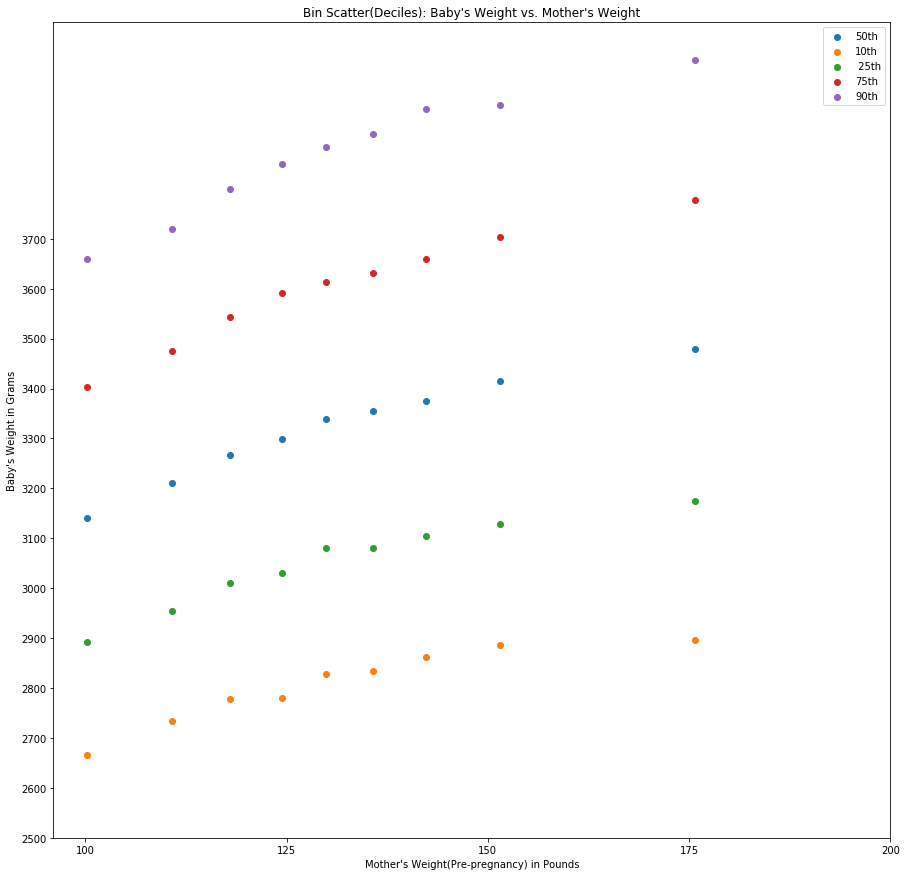

In [323]:
plt.figure(figsize = (15,15))

plt.scatter(d50th["momweight"],d50th["babyweight"])
plt.scatter(d10th["momweight"], d10th["babyweight"])
plt.scatter(d25th["momweight"], d25th["babyweight"])
plt.scatter(d75th["momweight"], d75th["babyweight"])
plt.scatter(d90th["momweight"], d90th["babyweight"])


plt.xticks([100,125,150,175,200])
plt.yticks(np.arange(2500,3800,100))
plt.title("Bin Scatter(Deciles): Baby's Weight vs. Mother's Weight")
plt.ylabel("Baby's Weight in Grams")
plt.xlabel("Mother's Weight(Pre-pregnancy) in Pounds")
plt.legend(["50th", "10th", " 25th", "75th", "90th"])

## (iii)

> They are quite similar. Both graphs are following the same linear shape in the percentiles whereas when using the individual (1-pound) values of mother's weight is "thicker" or rather more dispersed around the shape of the decile plot. It looks though, as mothers weight increases, the correlation between mothers weight and their baby's weight is decreasing. 

In [324]:
bucket_pound = np.arange(min(data["momweight"]-.5),max(data["momweight"]+.5),1)



In [325]:
dd4 = data
#Adds a new column to dd4 showing what bucket each mother is in.
dd4["bucket_pound"] = pd.cut(dd4["momweight"], bucket_pound, labels = np.arange(0,207,1))
#Grouping by each bucket and take the mean for each bucket
x = dd4.groupby("bucket_pound").mean()


In [326]:



#10th
d10th=dd4.groupby("bucket_pound").quantile(0.1)
d10th = d10th.reset_index()
d10th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]

#25th
d25th=dd4.groupby("bucket_pound").quantile(0.25)
d25th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]

d25th=dd4.groupby("bucket_pound").quantile(0.25)
d25th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]

d75th=dd4.groupby("bucket_pound").quantile(0.75)
d75th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]

d90th=dd4.groupby("bucket_pound").quantile(0.90)
d90th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]
d50th=dd4.groupby("bucket_pound").quantile(0.50)
d50th['momweight'] = dd4.groupby("bucket_pound").mean()["momweight"]


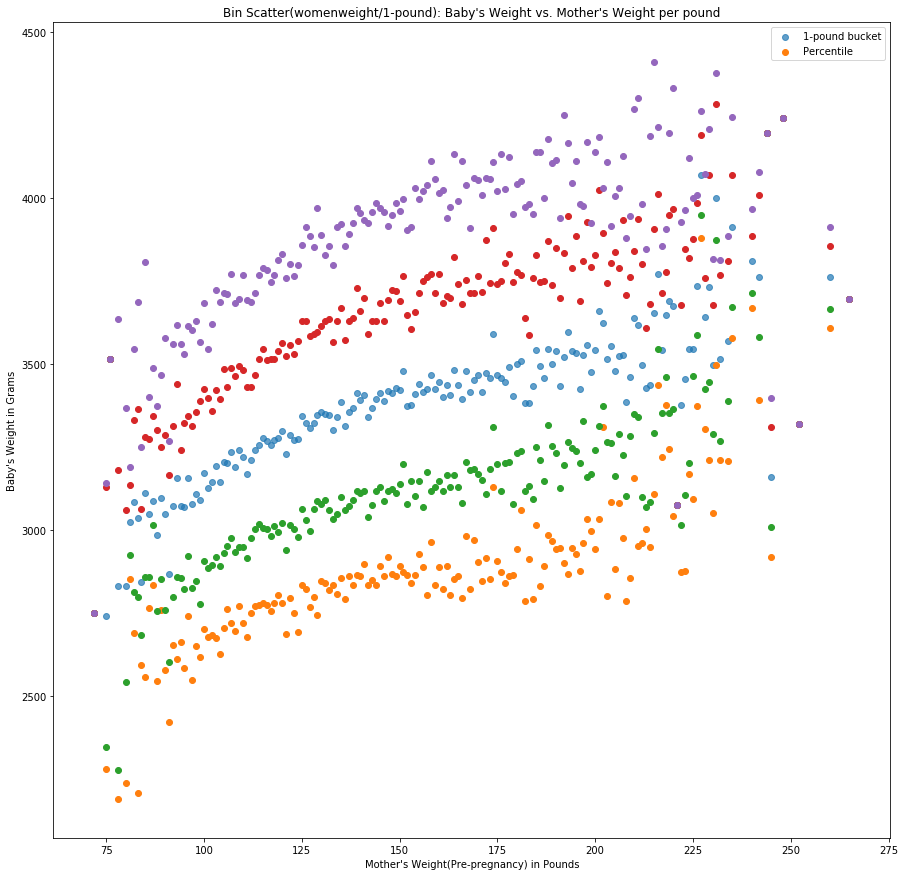

In [327]:
plt.figure(figsize = (15,15))
plt.scatter(x["momweight"],x["babyweight"], alpha = 0.7)
plt.scatter(d10th["momweight"], d10th["babyweight"])
plt.scatter(d25th["momweight"], d25th["babyweight"])
plt.scatter(d75th["momweight"], d75th["babyweight"])
plt.scatter(d90th["momweight"], d90th["babyweight"])
plt.title("Bin Scatter(womenweight/1-pound): Baby's Weight vs. Mother's Weight per pound")
plt.ylabel("Baby's Weight in Grams")
plt.xlabel("Mother's Weight(Pre-pregnancy) in Pounds")
plt.legend(["1-pound bucket", "Percentile"])

## Part 2B)

Although It seems as if there is more dispersion for women beneath 60 inches and above 67 inches, I think it is safe to say that mothers weight impact baby's weight. However, as mothers weight increases, more dispersion is observed around the previous pattern. I don't know what causes this, it could be such that for women weighing 200 and onward, their weight dependent on some covariate other than natural ones i.e some women pursue body lifting other women may live with an eating disorder. As a conclusion, I do think it is safe to say that babiesweight is correlated to mothers weight and height. 

In [328]:
#Sets the bucket sizes. 
buckets = np.arange(94.5,280.5,5)
len(np.arange(1,38,1))

37

In [329]:
dd5 = data

In [330]:
#adds another column to the dataset showing what bucket each row is in.
dd5["Buckets"] = pd.cut(dd5["momweight"], buckets, labels =np.arange(1,38,1) )

In [331]:
height_buckets = [0,1,2,3]
#Sets the mean height bucket for each mother
interval = [0,60.5, 63.5,66.5,150]
dd5["Mom_height_bucket"] = pd.cut(dd5["momheight"], interval, labels = height_buckets)

In [332]:
#Divides each women into their corresponding height bucket.
dd5["Mom_height_bucket"] = pd.cut(dd5["momheight"], interval, labels = height_buckets)
mean_group = dd5.groupby(['Buckets', "Mom_height_bucket"]).mean()
#Calculates the mid-point per each bucket.
median_group = dd5.groupby(["Buckets"]).median()
median_group
mean_group["midpoint"] = median_group['momweight']

merged_group = mean_group.merge(median_group, on="Buckets")

merged_group["Mom_height_bucket"] = pd.cut(merged_group["momheight_x"], interval, labels = height_buckets)


([<matplotlib.axis.XTick at 0x1261fcef0>,
 <a list of 19 Text xticklabel objects>)

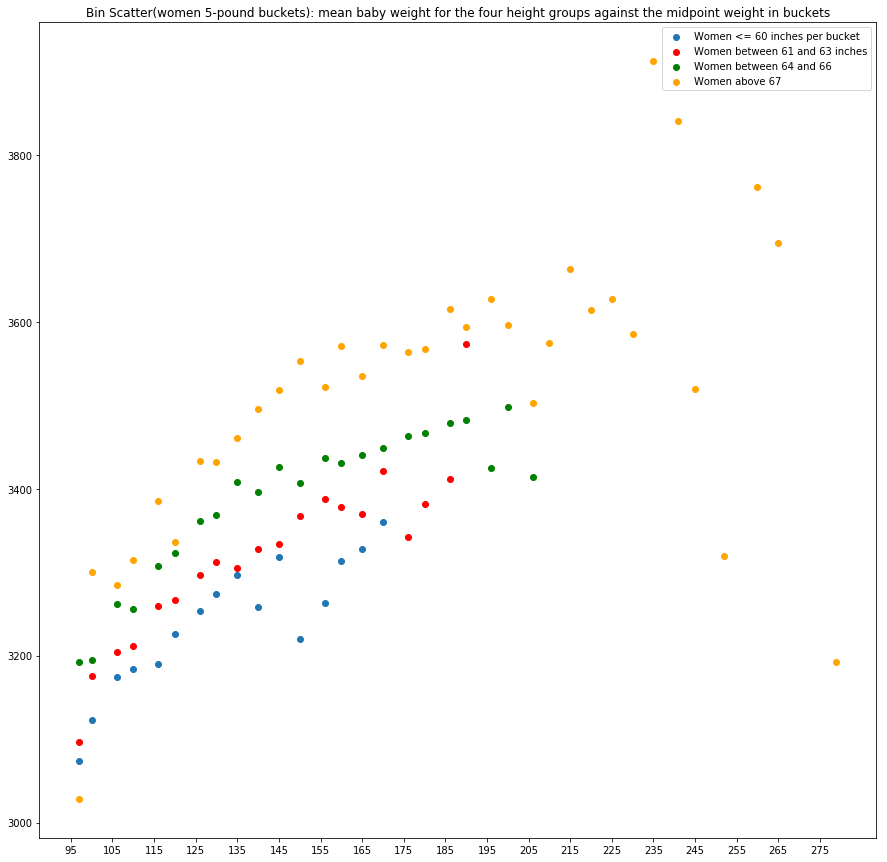

In [333]:
plt.figure(figsize = (15,15))
plt.scatter(merged_group[merged_group["Mom_height_bucket"] == 0]["momweight_y"], merged_group[merged_group["Mom_height_bucket"] == 0]["babyweight_x"])
plt.scatter(merged_group[merged_group["Mom_height_bucket"] == 1]["momweight_y"], merged_group[merged_group["Mom_height_bucket"] == 1]["babyweight_x"], color = "red")
plt.scatter(merged_group[merged_group["Mom_height_bucket"] == 2]["momweight_y"], merged_group[merged_group["Mom_height_bucket"] == 2]["babyweight_x"],color = "green")
plt.scatter(merged_group[merged_group["Mom_height_bucket"] == 3]["momweight_y"], merged_group[merged_group["Mom_height_bucket"] == 3]["babyweight_x"], color = 'orange')

plt.title("Bin Scatter(women 5-pound buckets): mean baby weight for the four height groups against the midpoint weight in buckets")
plt.legend(["Women <= 60 inches per bucket", "Women between 61 and 63 inches", "Women between 64 and 66 ", "Women above 67"])
plt.xticks(np.arange(95,280,10))


## 2c)

I have plotted the mean group of each women in the buckets form 2b. In addition I have recored the maximum and minimum of each women in each bucket. The reasoning was that I wanted to get a sense of how the data overall are fluctuating between the min and max. 

In [334]:
max_each_group = dd5.groupby(['Buckets', "Mom_height_bucket"]).max()
min_each_group = dd5.groupby(['Buckets', "Mom_height_bucket"]).min()
median = dd5.groupby(['Buckets', "Mom_height_bucket"]).median()

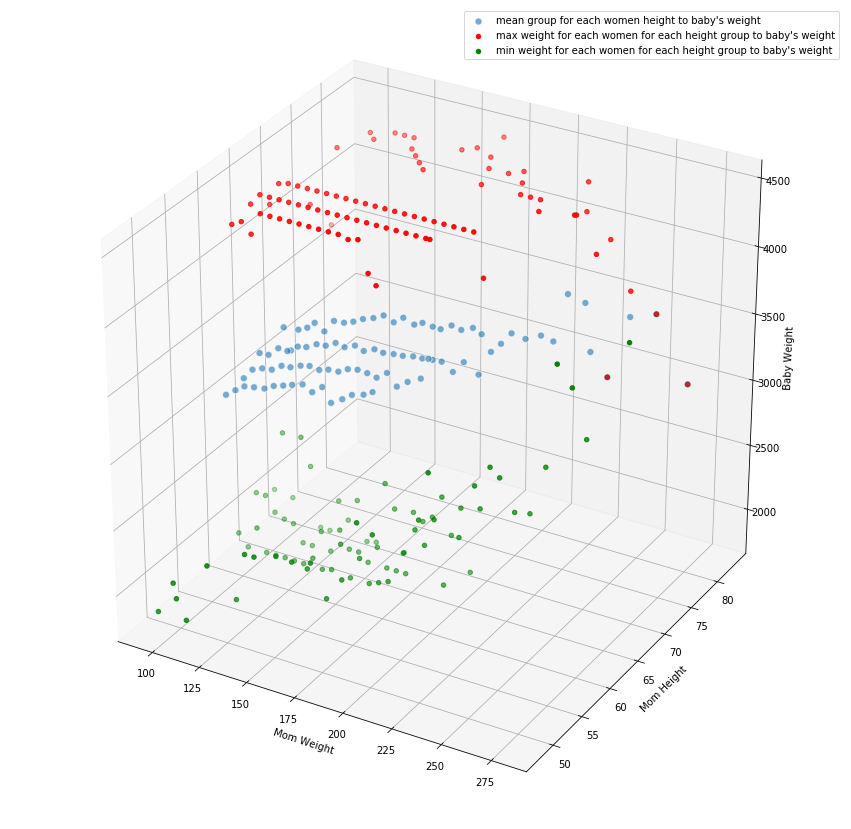

In [335]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

xs = mean_group['momweight']
ys = mean_group['momheight']
zs = mean_group['babyweight']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.scatter(max_each_group["momweight"],max_each_group["momheight"],max_each_group["babyweight"], color = 'red' )
ax.scatter(min_each_group["momweight"],min_each_group["momheight"],min_each_group["babyweight"], color = 'green' )

ax.set_xlabel('Mom Weight')
ax.set_ylabel('Mom Height')
ax.set_zlabel('Baby Weight')
ax.legend(["mean group for each women height to baby's weight","max weight for each women for each height group to baby's weight","min weight for each women for each height group to baby's weight" ])

plt.show()